In [1]:
!pip install pandas numpy matplotlib tensorflow keras sklearn &> /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3, MobileNetV3Large, ResNet50, VGG19

In [3]:
PATH_DATA = '../input/cars-data/data/data'

In [4]:
generator = ImageDataGenerator(rescale = 1./255., validation_split=0.2, width_shift_range=[1, 2, 3, 4, 5, 6, 7])

target_size = (100, 100)
batch_size = 32

train_batches = generator.flow_from_directory(
    PATH_DATA, class_mode='categorical', subset='training',
    batch_size=batch_size, target_size=target_size
)

test_batches = generator.flow_from_directory(
    PATH_DATA, class_mode='categorical', subset='validation', 
    batch_size=batch_size, target_size=target_size
)

validation_batches = generator.flow_from_directory(
    PATH_DATA, class_mode='categorical', subset='validation', 
    batch_size=batch_size, target_size=target_size
)

Found 12951 images belonging to 7 classes.
Found 3234 images belonging to 7 classes.
Found 3234 images belonging to 7 classes.


In [5]:
# preview data (batch size, width, height, colors)
print('x_train shape: ', train_batches[0][0].shape)
print('x_test shape: ', test_batches[0][0].shape)
print('y_train shape: ', train_batches[0][1].shape)
print('y_test shape: ', test_batches[0][1].shape)

x_train shape:  (32, 100, 100, 3)
x_test shape:  (32, 100, 100, 3)
y_train shape:  (32, 7)
y_test shape:  (32, 7)


In [6]:
# input shape
input_shape = train_batches[0][0][0].shape
input_shape

(100, 100, 3)

In [7]:
# output shape
output_shape = len(train_batches[0][1][0])
output_shape

7

In [8]:
model = VGG19(
    input_shape=input_shape,
    classes=output_shape,
    weights=None,
    pooling='max',
    classifier_activation='softmax'
)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-09-29 08:10:18.335288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 08:10:18.432239: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 08:10:18.433005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 08:10:18.434387: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [9]:
# train model
r = model.fit(train_batches, validation_data=validation_batches, epochs=100)

2022-09-29 08:10:21.765950: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-09-29 08:10:24.031964: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


405/405 [==============================] - 300s 720ms/step - loss: 9.7737 - accuracy: 0.2728 - val_loss: 1.7425 - val_accuracy: 0.2805
Epoch 2/100
405/405 [==============================] - 174s 429ms/step - loss: 1.7443 - accuracy: 0.2777 - val_loss: 1.7423 - val_accuracy: 0.2566
Epoch 3/100
405/405 [==============================] - 177s 436ms/step - loss: 1.7428 - accuracy: 0.2783 - val_loss: 1.7421 - val_accuracy: 0.2566
Epoch 4/100
405/405 [==============================] - 177s 437ms/step - loss: 1.7416 - accuracy: 0.2762 - val_loss: 1.7400 - val_accuracy: 0.2805
Epoch 5/100
405/405 [==============================] - 175s 432ms/step - loss: 1.7417 - accuracy: 0.2796 - val_loss: 1.7409 - val_accuracy: 0.2805
Epoch 6/100
405/405 [==============================] - 175s 432ms/step - loss: 1.7410 - accuracy: 0.2796 - val_loss: 1.7424 - val_accuracy: 0.2566
Epoch 7/100
405/405 [==============================] - 174s 430ms/step - loss: 1.7406 - accuracy: 0.2756 - val_loss: 1.7405 - val_

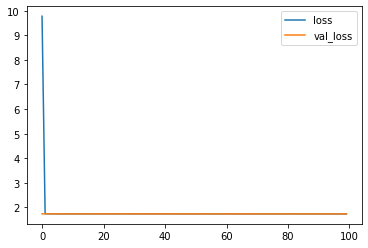

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

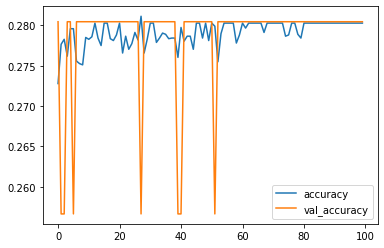

In [11]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()